# Introduction to Jupyter, Pandas, and Matplotlib

These three software packages are all popular in the world of data science and machine learning. 

### Jupyter 

Jupyter is the program that's running this "notebook" which is an interactive platform for executing python code. It's popular because it's an easy way to interactively edit and run python code, embed charts, and visualize data. Any code that can be run in a Jupyter notebook could also be run via the terminal or any other "runtime environment."

Basic tips for using Jupyter: 

* Hit shift+enter to execute the code in a cell.
* Variables are often saved to global scope. 
    * Be mindful of the order you execute cells in.
    * You can easily overwrite or change the data you're working with if you aren't careful!
    
https://jupyter.org/documentation

### Pandas 

Pandas is a library that excells at storing and manipulating data. It also has a wealth of tools built-in for performing statistical analysis and making charts. We'll explore the basic features of `pandas` here, but it's a big and powerful library, so feel free to explore the documentation and myriad tutorials all available online.

Think of it as a super spreadsheet inside of Python.

https://pandas.pydata.org/docs/

### Matplotlib

Matplotlib is a powerful charting library for Python. Although it is sometimes confusing and clunky to use, it produces high quality charts and is very detail-oriented, making it generally possible to produce whatever kind of chart you need. It is by no means the only popular charting/plotting library in Python, feel free to explore others such as Plotly, Seaborn, and ggplot.

Like Pandas, we'll see some basic features of `matplotlib` here, but the library is expansive. 

https://matplotlib.org/3.2.1/contents.html

In [1]:
# Conventionally, pd and plt are commonly chosen as names to import pandas and pyplot.
# This is not a requirement, but it is very common.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


# One of the things we love about pandas is that it's easy to load CSV data
# into a "data frame" which is the 
path_to_ny_sales = '../datasets/nyc-property/nyc-rolling-sales.csv'
sales_df = pd.read_csv(path_to_ny_sales)

# And, it makes it easy to take a look at the first n items:
sales_df.head(5)

,Unnamed: 0,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,...,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,,C2,153 AVENUE B,...,5,0,5,1633,6440,1900,2,C2,6625000,2017-07-19 00:00:00
1,5,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,26,,C7,234 EAST 4TH STREET,...,28,3,31,4616,18690,1900,2,C7,-,2016-12-14 00:00:00
2,6,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,39,,C7,197 EAST 3RD STREET,...,16,1,17,2212,7803,1900,2,C7,-,2016-12-09 00:00:00
3,7,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,,C4,154 EAST 7TH STREET,...,10,0,10,2272,6794,1913,2,C4,3936272,2016-09-23 00:00:00
4,8,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,,C2,301 EAST 10TH STREET,...,6,0,6,2369,4615,1900,2,C2,8000000,2016-11-17 00:00:00


In [2]:
# We can also get a summary with bundles of useful information on the numerical fields
sales_df.describe()

,Unnamed: 0,BOROUGH,BLOCK,LOT,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,YEAR BUILT,TAX CLASS AT TIME OF SALE
count,84548.000000,84548.000000,84548.000000,84548.000000,84548.000000,84548.000000,84548.000000,84548.000000,84548.000000,84548.000000
mean,10344.359878,2.998758,4237.218976,376.224015,10731.991614,2.025264,0.193559,2.249184,1789.322976,1.657485
std,7151.779436,1.289790,3568.263407,658.136814,1290.879147,16.721037,8.713183,18.972584,537.344993,0.819341
min,4.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4231.000000,2.000000,1322.750000,22.000000,10305.000000,0.000000,0.000000,1.000000,1920.000000,1.000000
50%,8942.000000,3.000000,3311.000000,50.000000,11209.000000,1.000000,0.000000,1.000000,1940.000000,2.000000
75%,15987.250000,4.000000,6281.000000,1001.000000,11357.000000,2.000000,0.000000,2.000000,1965.000000,2.000000
max,26739.000000,5.000000,16322.000000,9106.000000,11694.000000,1844.000000,2261.000000,2261.000000,2017.000000,4.000000


In [3]:
# Hmm... we might not have expected "zip code" to have a mean value...
# Lets look at all the columns in our dataframe along with their data types:
# Sometimes we get some unexpected datatypes when loading data
sales_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84548 entries, 0 to 84547
Data columns (total 22 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   Unnamed: 0                      84548 non-null  int64 
 1   BOROUGH                         84548 non-null  int64 
 2   NEIGHBORHOOD                    84548 non-null  object
 3   BUILDING CLASS CATEGORY         84548 non-null  object
 4   TAX CLASS AT PRESENT            84548 non-null  object
 5   BLOCK                           84548 non-null  int64 
 6   LOT                             84548 non-null  int64 
 7   EASE-MENT                       84548 non-null  object
 8   BUILDING CLASS AT PRESENT       84548 non-null  object
 9   ADDRESS                         84548 non-null  object
 10  APARTMENT NUMBER                84548 non-null  object
 11  ZIP CODE                        84548 non-null  int64 
 12  RESIDENTIAL UNITS               84548 non-null

In [4]:
# Sometimes it's also useful to loop over the columns and their datatypes:
for column_name, data_type in zip(sales_df.columns, sales_df.dtypes):
    print(column_name, data_type)

Unnamed: 0 int64
BOROUGH int64
NEIGHBORHOOD object
BUILDING CLASS CATEGORY object
TAX CLASS AT PRESENT object
BLOCK int64
LOT int64
EASE-MENT object
BUILDING CLASS AT PRESENT object
ADDRESS object
APARTMENT NUMBER object
ZIP CODE int64
RESIDENTIAL UNITS int64
COMMERCIAL UNITS int64
TOTAL UNITS int64
LAND SQUARE FEET object
GROSS SQUARE FEET object
YEAR BUILT int64
TAX CLASS AT TIME OF SALE int64
BUILDING CLASS AT TIME OF SALE object
SALE PRICE object
SALE DATE object


In [5]:
# Lets make things simpler by dropping a few columns:
columns_to_drop = [
    'Unnamed: 0', # I still honestly do not know what this column even is.
    'TAX CLASS AT PRESENT',
    'BLOCK',
    'LOT',
    'EASE-MENT',
    'BUILDING CLASS AT PRESENT',
    'TAX CLASS AT TIME OF SALE',
    'BUILDING CLASS AT TIME OF SALE',
    'BUILDING CLASS CATEGORY'
]

# Note, the drop operation is NOT in place, we have to store the result back into the 
# variable if we want to replace the data. We could also make a NEW variable that has
# the data dropped, and maintain the data frame with al the original data.
sales_df = sales_df.drop(columns=columns_to_drop)

# Lets look at the columns now...
sales_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84548 entries, 0 to 84547
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   BOROUGH            84548 non-null  int64 
 1   NEIGHBORHOOD       84548 non-null  object
 2   ADDRESS            84548 non-null  object
 3   APARTMENT NUMBER   84548 non-null  object
 4   ZIP CODE           84548 non-null  int64 
 5   RESIDENTIAL UNITS  84548 non-null  int64 
 6   COMMERCIAL UNITS   84548 non-null  int64 
 7   TOTAL UNITS        84548 non-null  int64 
 8   LAND SQUARE FEET   84548 non-null  object
 9   GROSS SQUARE FEET  84548 non-null  object
 10  YEAR BUILT         84548 non-null  int64 
 11  SALE PRICE         84548 non-null  object
 12  SALE DATE          84548 non-null  object
dtypes: int64(6), object(7)
memory usage: 8.4+ MB


In [6]:
# SALE PRICE should be a numeric, but it's an object. Lets see why:
sales_df['SALE PRICE']

0         6625000
1             -  
2             -  
3         3936272
4         8000000
           ...   
84543      450000
84544      550000
84545      460000
84546    11693337
84547       69300
Name: SALE PRICE, Length: 84548, dtype: object

In [7]:
# All those dashes are missing data... lets remove records that don't have a known sale price
# note again, these operations are NOT in place.

# First, coerce the column to a numeric type, and give unconvertable values "NA"
sales_df['SALE PRICE'] = pd.to_numeric(sales_df['SALE PRICE'], errors='coerce')

# Second, select the rows where the SALE PRICE is NOT NA
sales_df = sales_df[ sales_df['SALE PRICE'].notna() ]

sales_df['SALE PRICE']

0         6625000.0
3         3936272.0
4         8000000.0
6         3192840.0
9        16232000.0
            ...    
84543      450000.0
84544      550000.0
84545      460000.0
84546    11693337.0
84547       69300.0
Name: SALE PRICE, Length: 69987, dtype: float64

In [8]:
## MICRO-EXERCISE: Coerce all the LAND SQUARE FEET and GROSS SQUARE FEET 
# columns to numeric types and remove any records that cannot be coerced.


In [9]:
## Instructor solution to the micro exercise. Try to do it without looking at this!!
# ...
# ...
# ...
# ...
# ...
# ...

# Now, lets convert the rest of the columns that ought to be numeric...
columns_to_convert = [
    'LAND SQUARE FEET',
    'GROSS SQUARE FEET'
]

for column_name in columns_to_convert:
    sales_df[column_name] = pd.to_numeric(sales_df[column_name], errors='coerce')
    sales_df = sales_df[sales_df[column_name].notna()]

# Prove to ourselves that it worked.
sales_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48244 entries, 0 to 84547
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   BOROUGH            48244 non-null  int64  
 1   NEIGHBORHOOD       48244 non-null  object 
 2   ADDRESS            48244 non-null  object 
 3   APARTMENT NUMBER   48244 non-null  object 
 4   ZIP CODE           48244 non-null  int64  
 5   RESIDENTIAL UNITS  48244 non-null  int64  
 6   COMMERCIAL UNITS   48244 non-null  int64  
 7   TOTAL UNITS        48244 non-null  int64  
 8   LAND SQUARE FEET   48244 non-null  float64
 9   GROSS SQUARE FEET  48244 non-null  float64
 10  YEAR BUILT         48244 non-null  int64  
 11  SALE PRICE         48244 non-null  float64
 12  SALE DATE          48244 non-null  object 
dtypes: float64(3), int64(6), object(4)
memory usage: 5.2+ MB


In [10]:
# Additionally, note that the .describe() method now includes records for these.
sales_df.describe()

,BOROUGH,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,SALE PRICE
count,48244.000000,48244.000000,48244.000000,48244.000000,48244.000000,4.824400e+04,4.824400e+04,48244.000000,4.824400e+04
mean,3.251741,10939.681328,2.566537,0.249171,2.834632,3.358117e+03,3.669753e+03,1827.765173,1.153281e+06
std,0.903136,1072.752086,17.465481,10.988072,20.750418,3.143590e+04,2.947491e+04,464.361153,1.340131e+07
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000e+00
25%,3.000000,10469.000000,1.000000,0.000000,1.000000,1.413000e+03,8.280000e+02,1920.000000,8.042000e+04
50%,3.000000,11217.000000,1.000000,0.000000,1.000000,2.140000e+03,1.620000e+03,1931.000000,4.800000e+05
75%,4.000000,11237.000000,2.000000,0.000000,2.000000,3.071000e+03,2.520000e+03,1961.000000,8.300000e+05
max,5.000000,11694.000000,1844.000000,2261.000000,2261.000000,4.228300e+06,3.750565e+06,2017.000000,2.210000e+09


In [11]:
# These descriptive statistics can also be computed individually:
print(sales_df['SALE PRICE'].median())

print(sales_df['LAND SQUARE FEET'].mean())

print(sales_df['YEAR BUILT'].quantile(q=.25)) # 25th percentile

480000.0
3358.116553353785
1920.0


In [12]:
# Now there are some columns acting as numberical columns that should be
# treated as categorical columns. Lets fix that too:
categorical_columns = [
    'BOROUGH',
    'ZIP CODE'
]

for c in categorical_columns:
    sales_df[c] = sales_df[c].astype('category')
    
sales_df.describe()

,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,SALE PRICE
count,48244.000000,48244.000000,48244.000000,4.824400e+04,4.824400e+04,48244.000000,4.824400e+04
mean,2.566537,0.249171,2.834632,3.358117e+03,3.669753e+03,1827.765173,1.153281e+06
std,17.465481,10.988072,20.750418,3.143590e+04,2.947491e+04,464.361153,1.340131e+07
min,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000e+00
25%,1.000000,0.000000,1.000000,1.413000e+03,8.280000e+02,1920.000000,8.042000e+04
50%,1.000000,0.000000,1.000000,2.140000e+03,1.620000e+03,1931.000000,4.800000e+05
75%,2.000000,0.000000,2.000000,3.071000e+03,2.520000e+03,1961.000000,8.300000e+05
max,1844.000000,2261.000000,2261.000000,4.228300e+06,3.750565e+06,2017.000000,2.210000e+09


In [13]:
# A common thing to want to do is filter records in or out of a dataframe.
# Pandas uses a fairly unique syntax for this, overloading the [] operator.

# All records where the sale price is less than $500,000
half_mil_plus_df = sales_df[ sales_df['SALE PRICE'] < 500000 ]
half_mil_plus_df.describe()

,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,SALE PRICE
count,24986.000000,24986.000000,24986.000000,2.498600e+04,2.498600e+04,24986.000000,24986.000000
mean,2.115064,0.214720,2.365965,2.884916e+03,3.031523e+03,1799.224446,174810.569039
std,13.042533,14.391817,19.461069,2.039135e+04,2.102393e+04,513.166012,185169.148224
min,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000
25%,1.000000,0.000000,1.000000,8.415000e+02,0.000000e+00,1920.000000,0.000000
50%,1.000000,0.000000,1.000000,2.000000e+03,1.408000e+03,1931.000000,115650.000000
75%,2.000000,0.000000,2.000000,2.750000e+03,2.280000e+03,1960.000000,360000.000000
max,889.000000,2261.000000,2261.000000,2.128899e+06,1.330743e+06,2017.000000,499999.000000


In [14]:
# All records with built in 1975
built_in_1975_df = sales_df[ sales_df['YEAR BUILT'] == 1975]
built_in_1975_df.describe()

,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,SALE PRICE
count,359.000000,359.000000,359.000000,3.590000e+02,359.000000,359.0,3.590000e+02
mean,4.133705,0.779944,4.913649,1.692311e+04,11500.980501,1975.0,3.025335e+06
std,47.103404,9.411394,48.382274,1.448103e+05,73155.606694,0.0,3.396430e+07
min,0.000000,0.000000,0.000000,0.000000e+00,0.000000,1975.0,0.000000e+00
25%,1.000000,0.000000,1.000000,2.316000e+03,1504.000000,1975.0,4.080000e+05
50%,1.000000,0.000000,2.000000,3.040000e+03,2130.000000,1975.0,5.350000e+05
75%,2.000000,0.000000,2.000000,4.000000e+03,2800.000000,1975.0,7.575000e+05
max,894.000000,126.000000,902.000000,1.865243e+06,829024.000000,1975.0,6.200000e+08


In [15]:
# All records with at least one residential unit AND at least one commerical unit (mixed use)
# Note that use of AND and OR is also a little unique in Pandas: https://pandas.pydata.org/pandas-docs/version/0.15.2/indexing.html#boolean-indexing
# AND is &, OR is |, NOT is ~, and you must always wrap the boolean expressions in parenthesis. 
mixed_use_df = sales_df[ (sales_df['RESIDENTIAL UNITS'] >= 1) & (sales_df['COMMERCIAL UNITS'] >= 1) ]
mixed_use_df.describe()

,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,SALE PRICE
count,2167.000000,2167.000000,2167.000000,2.167000e+03,2.167000e+03,2167.000000,2.167000e+03
mean,10.936317,1.502538,12.418090,5.936154e+03,1.237964e+04,1926.549608,3.354544e+06
std,61.300070,1.520518,62.168832,9.237351e+04,9.106355e+04,46.883307,1.805514e+07
min,1.000000,1.000000,1.000000,0.000000e+00,0.000000e+00,0.000000,0.000000e+00
25%,2.000000,1.000000,3.000000,1.757000e+03,2.700000e+03,1915.000000,0.000000e+00
50%,2.000000,1.000000,3.000000,2.003000e+03,3.600000e+03,1928.000000,6.600000e+05
75%,5.000000,1.000000,6.000000,2.706500e+03,5.698000e+03,1931.000000,1.769984e+06
max,1844.000000,25.000000,1866.000000,4.228300e+06,3.750565e+06,2017.000000,6.200000e+08


In [16]:
# All records with that sold for more than $1,000,000 or less than $100,000
cheap_and_expensive = sales_df[ (sales_df['SALE PRICE'] >= 1000000) | (sales_df['SALE PRICE'] <= 100000) ]
cheap_and_expensive.describe()

,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,SALE PRICE
count,20474.000000,20474.000000,20474.000000,2.047400e+04,2.047400e+04,20474.000000,2.047400e+04
mean,3.943636,0.411498,4.396942,4.093722e+03,6.183899e+03,1777.342727,1.978790e+06
std,22.371109,5.815409,23.256876,3.276783e+04,3.550736e+04,540.612432,2.054134e+07
min,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000e+00
25%,1.000000,0.000000,1.000000,1.406000e+03,0.000000e+00,1910.000000,0.000000e+00
50%,2.000000,0.000000,2.000000,2.024500e+03,2.210000e+03,1928.000000,1.000000e+00
75%,3.000000,0.000000,3.000000,3.000000e+03,3.383750e+03,1958.000000,1.400000e+06
max,948.000000,436.000000,955.000000,3.014056e+06,1.617206e+06,2017.000000,2.210000e+09


In [17]:
# Mini-Exercise: Use the filtering syntax to select all the properties that...

# Have higher than the median number of total units.

# Have exactly 1 commercial unit

# were built after 1990 and have at least one commercial unit

## Charting Basics

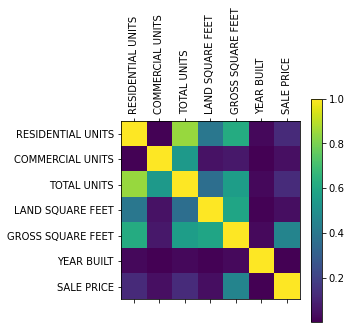

In [18]:
# Lets use matplotlib and pandas to make a correlation matrix, we want to know which numeric 
# columns correlate most with the sale price:

# Pandas gives us the correlation matrix
correlation_matrix = sales_df.corr()

# Matplotlib code to display it, along with the names of each field on the axes and a 
# colorbar legend:
plt.matshow(correlation_matrix)
plt.xticks(range(len(correlation_matrix.columns)), correlation_matrix.columns, rotation='vertical')
plt.yticks(range(len(correlation_matrix.columns)), correlation_matrix.columns)
plt.colorbar()
plt.show()

In [19]:
# Notice that nothing really correlates super strongly with sale price... 
# Gross sq feet is the strongest, in the 0.6 range. 
# The truth is: real estate is complex. Location matters, and so do a bunch of other factors!

RESIDENTIAL UNITS


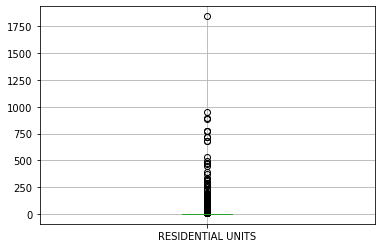

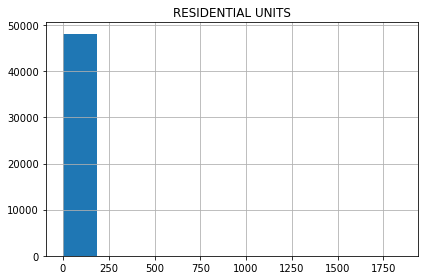

COMMERCIAL UNITS


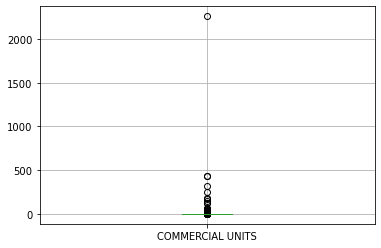

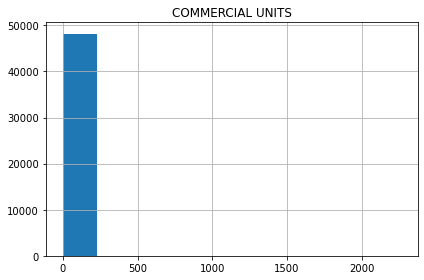

TOTAL UNITS


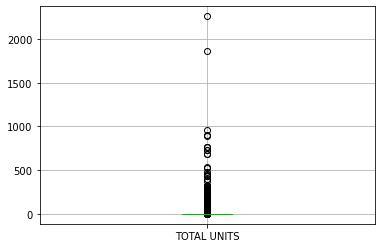

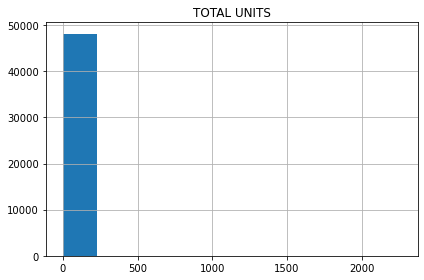

LAND SQUARE FEET


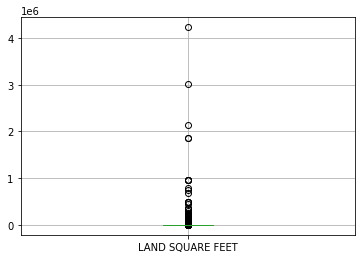

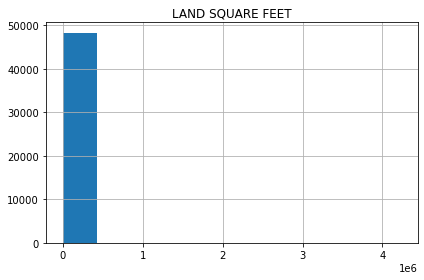

GROSS SQUARE FEET


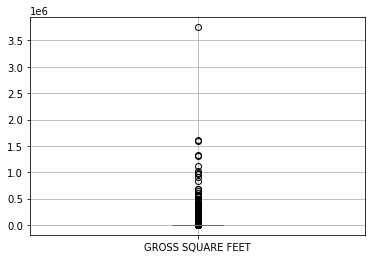

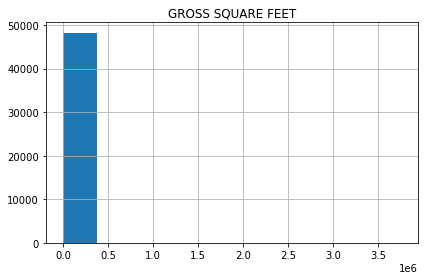

YEAR BUILT


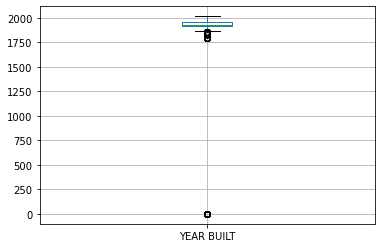

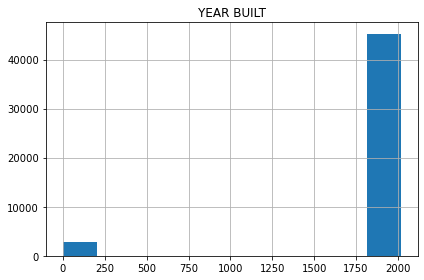

SALE PRICE


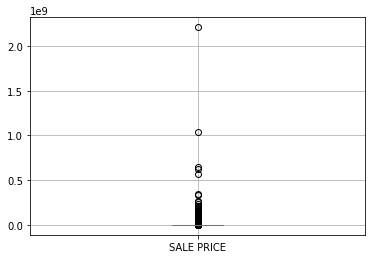

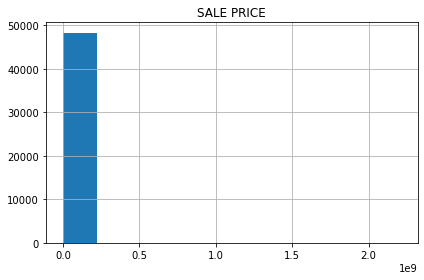

In [20]:
# Pandas can access matplotlib under the hood with some convinenent functions.
# Lets make a box plot and histogram for each numerical column.
# Lets plot two interesting charts:
for column_name, data_type in zip(sales_df.columns, sales_df.dtypes):
    if data_type not in ['float', 'int', 'float64', 'int64']: continue

    print(column_name)
    sales_df.boxplot(column=[column_name])
    sales_df.hist(column=[column_name])

    # Matplotlib's tight_layout function makes the charts a bit cleaner.
    plt.tight_layout()
    plt.show()

In [21]:
# MICRO-Exercise: Make a pie chart representing what share of houses were built in each year
# Tip: use the documentation! https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.pie.html#pandas.DataFrame.plot.pie


# Vector operations and more filtering

Filtered: RESIDENTIAL UNITS


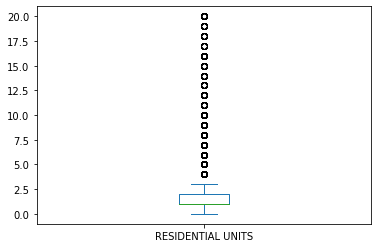

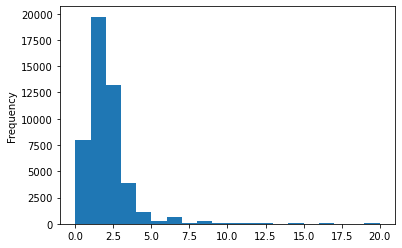

Filtered: COMMERCIAL UNITS


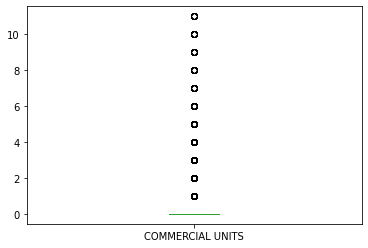

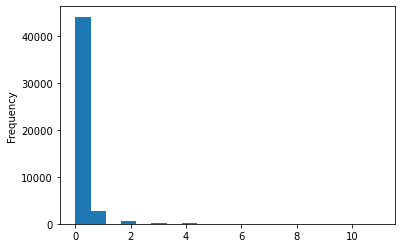

Filtered: TOTAL UNITS


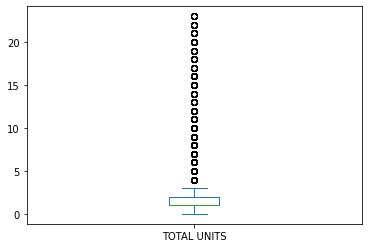

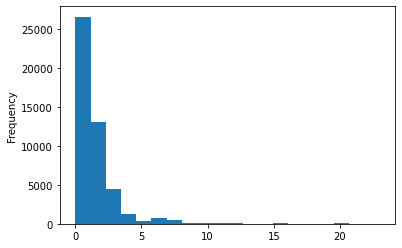

Filtered: LAND SQUARE FEET


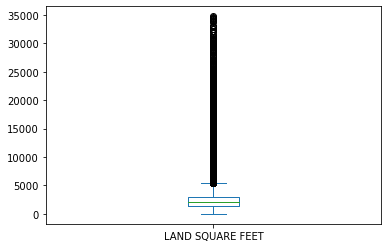

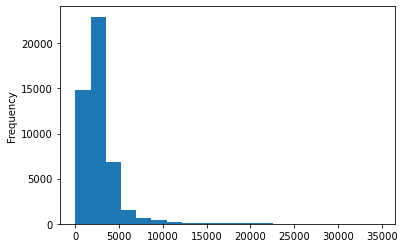

Filtered: GROSS SQUARE FEET


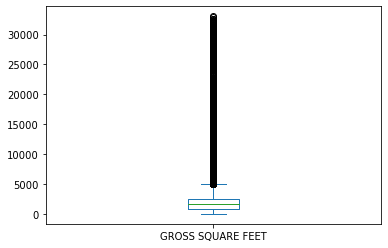

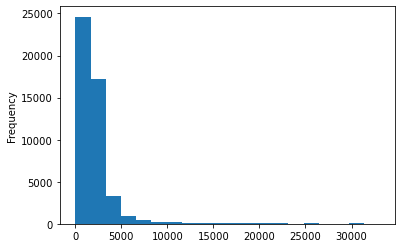

Filtered: YEAR BUILT


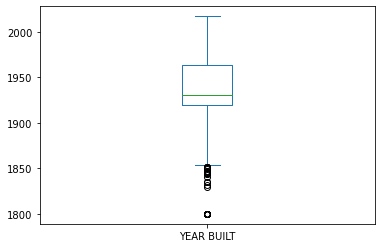

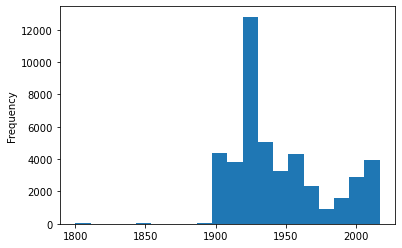

Filtered: SALE PRICE


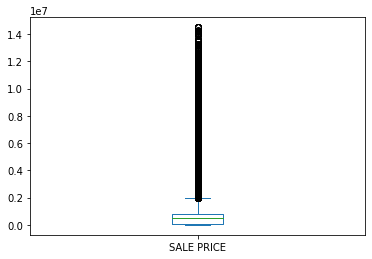

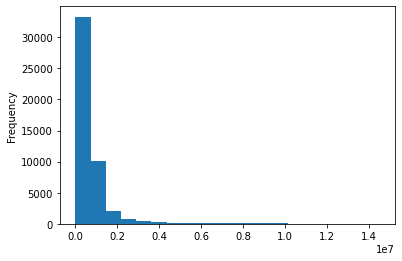

In [22]:
# Interesting... lots of outliers in this dataset!
# Lets remove anything with a z-score higher than 1 for each column and plot that.
# Note, this code DOES NOT modify sales_df.
for column_name, data_type in zip(sales_df.columns, sales_df.dtypes):
    if data_type not in ['float', 'int', 'float64', 'int64']: continue
    
    # This will compute the z_score for each row in the whole column
    # and the results will be parallel to our original dataframe.
    column_z_score = (sales_df[column_name] - sales_df[column_name].mean()) / sales_df[column_name].std(ddof=0)

    # now, grab the original data and filter down to rows with z-scores between -(1, 1)
    filtered_column = sales_df[column_name][np.abs(column_z_score) < 1]
    
    print('Filtered: ' + column_name)
    
    filtered_column.plot.box()
    plt.show()
    
    filtered_column.plot.hist(bins=20)
    plt.show()

In [23]:
# Much more interesting...
# That's the whirlwind tour of pandas, matplotlib, and jupyter notebook. Now, attempt the exercise.